# 🚂Predicting the Sale Price of Bulldozers using Machine Learning
* Press `WINDOW+PERIOD (.)` to access emojis

## The Goal or Problem Description
* **"Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers".**

The goal is to **predict sale prices of bulldozers given some attributes and historical sale prices** of similar bulldozers.
tion
## Dataset
For Dataset Description see **Kaggle's** [Blue Book for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/dataThe data for this competition is split into three parts:

* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition

## Evaluation
"The evaluation metric for this competition is the **RMSLE (root mean squared log error)** between the actual and predicted auction prices." See [Evaluation](https://www.kaggle.com/c/bluebook-for-bulldozers/overview) on Kaggle.

## Features
The key fields in **train.csv** are:

* **SalesID**: the uniue identifier of the sale
* **MachineID**: the unique identifier of a machine.  A machine can be sold multiple times
* **saleprice**: what the machine sold for at auction (only provided in train.csv)
* **saledate**: the date of the sale.

See also provide a [Data Dictionary](view-source:https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx) with all columns' descriptions in the dataset. sale) 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('../resources/data/bulldozers/TrainAndValid.csv', low_memory = False)

In [3]:
print(df.shape)
df.head()

(412698, 53)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
z = df.isnull().sum()
print(f'Columns with missing values:\n{z[z > 0]}')

Columns with missing values:
auctioneerID                 20136
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width                 386715
Enclosure_Type              386715
Engine_Horsepower           386715
Hydraulics                   82565
Pushblock                   386715
Ripper                      305753
Scarifier                   386704
Tip_Control                 386715
Tire_Size                   315060
Coupler                     192019
Coupler_System              367724
Grouser_Tracks            

### Some Visualizations...

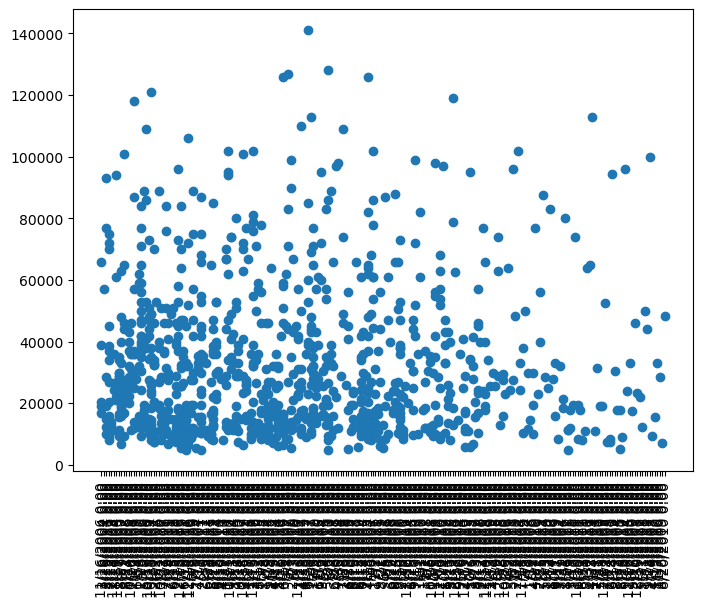

In [7]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])
plt.xticks(rotation = 90);

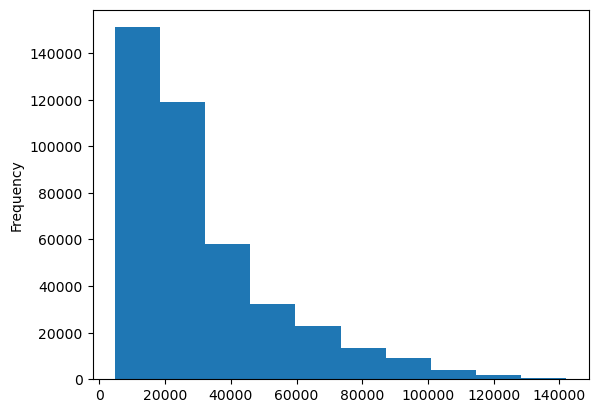

In [8]:
df.SalePrice.plot(kind = 'hist');

### Parsing Dates

In [11]:
print(df.saledate.dtype)
df = pd.read_csv('../resources/data/bulldozers/TrainAndValid.csv', low_memory = False, parse_dates = ['saledate'])
print(df.saledate.dtype)

object
datetime64[ns]


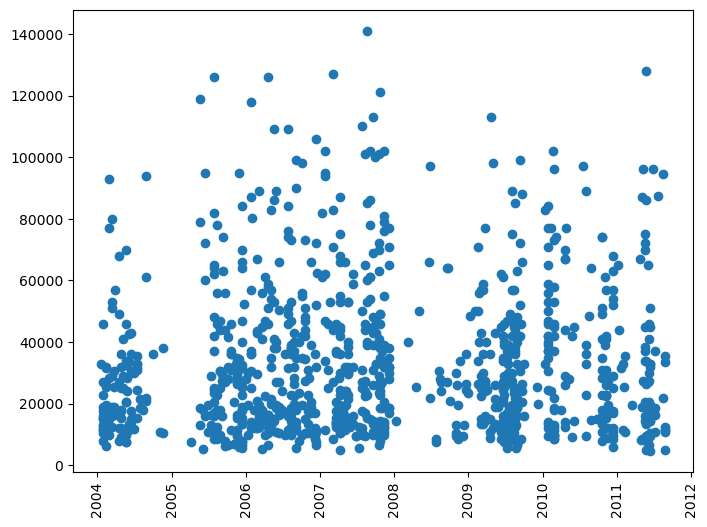

In [12]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])
plt.xticks(rotation = 90);

In [13]:
df.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort DataFrame by saledate
It's a good approach to sort the DataFrame by date column when working with time series data.

In [15]:
df.sort_values(by = ['saledate'], ascending = True, inplace = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the DataFrame before manipulating it

In [37]:
df_copy = df.copy()
df_copy.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


### Feature Engineering: Add daytime columns in the DataFrame using `saledate`column

In [38]:
df_copy['saleYear'] = df_copy.saledate.dt.year
df_copy['saleMonth'] = df_copy.saledate.dt.month
df_copy['saleDay'] = df_copy.saledate.dt.day
df_copy['saleDayOfWeek'] = df_copy.saledate.dt.dayofweek
df_copy['saleDayOfYear'] = df_copy.saledate.dt.dayofyear

In [39]:
df_copy[['saleYear', 'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear']].head()

,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1989,1,17,1,17
274835,1989,1,31,1,31
141296,1989,1,31,1,31
212552,1989,1,31,1,31
62755,1989,1,31,1,31


### We can now drop the `saledate` from the copy of the DataFrame

In [40]:
df_copy.drop('saledate', axis = 1, inplace = True)

In [41]:
df_copy.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## Build a machine learning Regressor Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# This won't work since all columns are not numeric or date!
# model = RandomForestRegressor(n_jobs = -1, random_state = 42)
# model.fit(df_copy.drop('SalePrice', axis = 1), df_copy.SalePrice)

### Taking care of missing and categorical data
#### Categorical data

In [42]:
df_copy.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [43]:
str_types = [col for col, values in df_copy.items() if pd.api.types.is_string_dtype(values)]
str_types

['fiModelDesc',
 'fiBaseModel',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc']

In [44]:
obj_types = [col for col, values in df_copy.items() if pd.api.types.is_object_dtype(values)]
obj_types

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [45]:
# for col in [col for col, values in df_copy.items() if pd.api.types.is_object_dtype(values)]:
#     df_copy[col] = df_copy[col].astype('category')

for col in [col for col, values in df_copy.items() if pd.api.types.is_object_dtype(values)]:
    df_copy[col] = df_copy[col].astype('category').cat.as_ordered()

In [46]:
df_copy.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [47]:
## This would equally work
# for col in list(df_copy.select_dtypes(include = ['object'])):
#     df_copy[col] = df_copy[col].astype('category').cat.as_ordered()

In [48]:
df_copy.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

### The State Categories

In [49]:
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

### State Categories as numbers

In [50]:
df_copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Missing data

In [53]:
z = df_copy.isnull().sum() / len(df_copy)
print(f'Proportion of missing values per column:\n{z[z > 0]}')

Proportion of missing values per column:
auctioneerID                0.048791
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
Blade_Extension             0.937041
Blade_Width                 0.937041
Enclosure_Type              0.937041
Engine_Horsepower           0.937041
Hydraulics                  0.200062
Pushblock                   0.937041
Ripper                      0.740864
Scarifier                   0.937014
Tip_Control                 0.937041
Tire_Size                   0.763415
Coupler                     0.4652

### Save and load the new data

In [54]:
df_copy.to_csv('../resources/data/bulldozers/train_copy.csv', index = False)

In [55]:
df_new = pd.read_csv('../resources/data/bulldozers/train_copy.csv', low_memory = False)

In [56]:
df_new.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Filling the numeric missing values

In [58]:
list(df_new.select_dtypes(exclude = ['object']))

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear']

In [59]:
df_new.select_dtypes(exclude = ['object']).isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
saleYear                         0
saleMonth                        0
saleDay                          0
saleDayOfWeek                    0
saleDayOfYear                    0
dtype: int64

In [60]:
z = df_new.select_dtypes(include = ['number']).isnull().sum()
print(z[z > 0])

auctioneerID                 20136
MachineHoursCurrentMeter    265194
dtype: int64


### Add a binary column which tells if the numeric data is missing

In [65]:
z = df_new.select_dtypes(exclude = ['object']).isnull().sum()
for col in z[z > 0].index:
    df_new[col + '_is_missing'] = df_new[col].isnull().astype(int)
    df_new[col] = df_new[col].fillna(df_new[col].median())

In [67]:
df_new.select_dtypes(exclude = ['object']).head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,1989,1,17,1,17,0,1
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,1989,1,31,1,31,0,1
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,1989,1,31,1,31,0,1
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,1989,1,31,1,31,0,1
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,1989,1,31,1,31,0,1


#### Check again for missing values in numeric columns

In [69]:
z = df_new.select_dtypes(exclude = ['object']).isnull().sum()
print(z[z > 0])

Series([], dtype: int64)


In [70]:
df_new.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

### Imputing Missing Categorical values

In [72]:
z = df_new.select_dtypes(exclude = ['number']).isnull().sum()
print(z[z > 0])

UsageBand                  339028
fiSecondaryDesc            140727
fiModelSeries              354031
fiModelDescriptor          337882
ProductSize                216605
Drive_System               305611
Enclosure                     334
Forks                      214983
Pad_Type                   331602
Ride_Control               259970
Stick                      331602
Transmission               224691
Turbocharged               331602
Blade_Extension            386715
Blade_Width                386715
Enclosure_Type             386715
Engine_Horsepower          386715
Hydraulics                  82565
Pushblock                  386715
Ripper                     305753
Scarifier                  386704
Tip_Control                386715
Tire_Size                  315060
Coupler                    192019
Coupler_System             367724
Grouser_Tracks             367823
Hydraulics_Flow            367823
Track_Type                 310505
Undercarriage_Pad_Width    309782
Stick_Length  

In [74]:
df_new.dtypes

SalesID                                  int64
SalePrice                              float64
MachineID                                int64
ModelID                                  int64
datasource                               int64
auctioneerID                           float64
YearMade                                 int64
MachineHoursCurrentMeter               float64
UsageBand                               object
fiModelDesc                             object
fiBaseModel                             object
fiSecondaryDesc                         object
fiModelSeries                           object
fiModelDescriptor                       object
ProductSize                             object
fiProductClassDesc                      object
state                                   object
ProductGroup                            object
ProductGroupDesc                        object
Drive_System                            object
Enclosure                               object
Forks        

### Converting Categorical columns into Numeric using `pd.Categorical`
`pd.Categorical(values).codes` converts missing values or `NaN` into `-1`. Adding 1 to the result will convert missing values to `0`.
We are adding columns to **keep information about missing values**.

In [80]:
for col in list(df_new.select_dtypes(exclude = ['number'])):
    df_new[col + '_is_missing'] = df_new[col].isnull().astype(int)
    df_new[col] = pd.Categorical(df_new[col]).codes + 1

### Check the whole DataFrame for missing values

In [81]:
z = df_new.isnull().sum()
print(z[z > 0])

Series([], dtype: int64)


In [82]:
df_new.tail(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
412688,6283634,35000.0,1930870,4701,149,99.0,1998,0.0,0,989,...,1,1,1,1,1,1,1,1,0,0
412689,6282337,7500.0,1928688,22072,149,99.0,2005,0.0,0,536,...,1,1,1,1,1,1,1,1,1,1
412690,6311321,13000.0,1823846,17311,149,99.0,2005,0.0,0,4261,...,1,1,1,1,1,1,1,1,1,1
412691,6306476,53000.0,1278794,9114,149,99.0,2004,0.0,0,4818,...,1,1,1,1,1,1,1,1,0,0
412692,6281219,39000.0,1792049,13976,149,99.0,2000,0.0,0,1319,...,1,1,1,1,1,1,1,1,1,1
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,1,1,1,1,1,0,0,0,1,1
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,1,1,1,1,1,1,1,1,1,1
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,1,1,1,1,1,1,1,1,1,1
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,1,1,1,1,1,1,1,1,1,1
412697,6283635,34000.0,1869284,4701,149,99.0,1000,0.0,0,989,...,1,1,1,1,1,1,1,1,0,0


### Fitting a Machine Learning Model
Now that our dataset is all numeric and without any missing values, we can use it to train a model.

In [84]:
%%time
model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(df_new.drop('SalePrice', axis = 1), df_new.SalePrice)

CPU times: total: 38min 38s
Wall time: 5min 15s


RandomForestRegressor(n_jobs=-1, random_state=42)

### Score the model using same data it was trained on
The default metric for a regression model is the **Coefficient of Determination (R^2)**.

In [85]:
%%time
model.score(df_new.drop('SalePrice', axis = 1), df_new.SalePrice)

CPU times: total: 44 s
Wall time: 7.18 s


0.9875468079970562

### Train - Validation Split
The **validation set** includes all data in 2012. According to [Dataset Description](https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx):

* **Valid.csv** is the validation set, which contains data from **January 1, 2012 - April 30, 2012** You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

In [86]:
df_val = df_new[df_new.saleYear == 2012]
df_train = df_new[df_new.saleYear != 2012]

In [87]:
len(df_val), len(df_train)

(11573, 401125)

### Create Features X and Target y

In [88]:
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train.SalePrice
X_val, y_val = df_val.drop('SalePrice', axis = 1), df_val.SalePrice

In [89]:
print(f'Shape train features: {X_train.shape}')
print(f'Shape train target: {y_train.shape}')
print(f'Shape validation features: {X_val.shape}')
print(f'Shape validation target: {y_val.shape}')

Shape train features: (401125, 102)
Shape train target: (401125,)
Shape validation features: (11573, 102)
Shape validation target: (11573,)


### Root Mean Squared Log Error (RMSLE)
**RMSLE** is the evaluation metric for this project as stated in the Dataset Description on Kaggle.
* **RMSLE** is non-negative floating point value (the best value is 0.0),  
* or an array of floating point values, one for each individual target.

#### Helper Function to evaluate RMSLE

In [95]:
# from sklearn.metrics import root_mean_squared_log_error  # requires sklearn v1.4

In [102]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Computes Root Mean Squared Log Error of a regression model
    y_test: Ground truth
    y_preds: model predictions
    return: RMSLE
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def regression_scores_from_model(model, X_train, y_train, X_val, y_val):
    '''
    Computes evaluation matrics for a regression model
    model: The trained model
    X_train: Training features
    y_train: Training targets
    X_val: Validation features
    y_val: Validation targets
    return: dictionary of scores
    '''
    y_preds_train = model.predict(X_train)
    y_preds_val = model.predict(X_val)
    scores = {'Training MAE': mean_absolute_error(y_train, y_preds_train),
              'Validation MAE': mean_absolute_error(y_val, y_preds_val),
              'Training RMSLE': rmsle(y_train, y_preds_train),
              'Validation RMSLE': rmsle(y_val, y_preds_val),
              'Training R^2': r2_score(y_train, y_preds_train),
              'Validation R^2': r2_score(y_val, y_preds_val),
             }
    return scores

### Testing our model on a subset of our data to reduce the processing time
Since we are using `RandomForestRegressor` it has a parameter called `max_samples` which we can adjust or set.

In [103]:
%%time
model = RandomForestRegressor(n_jobs = -1, max_samples = 10_000, random_state = 42)
model.fit(X_train, y_train)

CPU times: total: 1min 28s
Wall time: 14.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

### Evaluate the model

In [104]:
scores = regression_scores_from_model(model, X_train, y_train, X_val, y_val)
scores

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Validation R^2': 0.8320374995090507}

### Hyperparameter Tuning using RandomizedSearchCV

In [116]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'log2'],
    'max_samples': [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = param_grid,
                              cv = 5,
                              n_iter = 100,
                              verbose = True
                             )

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 18min 57s
Wall time: 19min 21s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [117]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

### Evaluate the randomized model

In [118]:
scores = regression_scores_from_model(rs_model, X_train, y_train, X_val, y_val)
scores

{'Training MAE': 6127.8168475875555,
 'Validation MAE': 7470.280734247674,
 'Training RMSLE': 0.27769391978432667,
 'Validation RMSLE': 0.30351561966479695,
 'Training R^2': 0.8329303814145863,
 'Validation R^2': 0.8197024790490098}

### Training a model using best hyperparameters (from instructor)

In [119]:
rf_reg_model = RandomForestRegressor(n_estimators = 40,
                                     min_samples_leaf = 1,
                                     min_samples_split = 14,
                                     max_features = 0.5,
                                     n_jobs = -1
                                    )

rf_reg_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [120]:
scores = regression_scores_from_model(rf_reg_model, X_train, y_train, X_val, y_val)
scores

{'Training MAE': 2946.833670641681,
 'Validation MAE': 5961.094179172086,
 'Training RMSLE': 0.14425004297528,
 'Validation RMSLE': 0.24582834474656592,
 'Training R^2': 0.9590974568183458,
 'Validation R^2': 0.8816127282949133}

### Testing the model (`rf_reg_model`) using the test dataset provided
* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition

In [121]:
df_test = pd.read_csv('../resources/data/bulldozers/Test.csv', parse_dates = ['saledate'], low_memory = False)
print(df_test.shape)
df_test.head()

(12457, 52)


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [130]:
z = df_test.isnull().sum()
print(z[z > 0])

MachineHoursCurrentMeter    10328
UsageBand                   10623
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type              11806
Engine_Horsepower           11806
Hydraulics                   2142
Pushblock                   11806
Ripper                       9753
Scarifier                   11806
Tip_Control                 11806
Tire_Size                    9679
Coupler                      4856
Coupler_System              10391
Grouser_Tracks              10391
Hydraulics_Flow             10391
Track_Type                   9063
Undercarriage_

### Preprocessing the test data (similar to the training dataset)
#### Helper function for preprocessing dataset

In [122]:
def preprocess_data(test_df):
    df = test_df.copy()
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis = 1, inplace = True)

    # Handling numerical columns
    z = df.select_dtypes(exclude = ['object']).isnull().sum()
    for col in z[z > 0].index:
        df[col + '_is_missing'] = df[col].isnull().astype(int)
        df[col] = df[col].fillna(df[col].median())
        
    # Handling categorical columns
    for col in list(df.select_dtypes(exclude = ['number'])):
        df[col + '_is_missing'] = df[col].isnull().astype(int)
        df[col] = pd.Categorical(df[col]).codes + 1

    return df

#### Process Test data

In [123]:
df_test_new = preprocess_data(df_test)

In [124]:
df_test_new.shape

(12457, 101)

In [125]:
df_test_new.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,1,1,1,1,1,1,1,1,1,1
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,1,1,1,1,1,1,1,1,0,0
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,1,1,1,1,1
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,1,1,1,1,1
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,1,1,1,1,0,0,0,1,1


In [126]:
z = df_test_new.isnull().sum()
print(z[z > 0])

Series([], dtype: int64)


### Evaluating the model using preprocessed test dataset

In [131]:
#y_preds = rf_reg_model.predict(df_test_new)

In [ ]:
#set(list(X_train)) - set(list(df_test_new))      # find the missing column

**The column `auctioneerID` has NO missing! As a result the preprocessed test dataset is missing `auctioneerID_is_missing` column. We can add this with all values `0`.**

In [134]:
list(df_test_new).index('MachineHoursCurrentMeter_is_missing')

56

In [135]:
idx = list(df_test_new).index('MachineHoursCurrentMeter_is_missing')
df_test_new.insert(idx, 'auctioneerID_is_missing', [0]*len(df_test_new))
df_test_new.shape

(12457, 102)

In [136]:
%%time
y_preds = rf_reg_model.predict(df_test_new)

CPU times: total: 500 ms
Wall time: 248 ms


In [137]:
y_preds

array([15990.26821082, 16733.87498421, 47007.915008  , ...,
       16473.8933564 , 18733.6421833 , 28903.67559084])

In [142]:
len(y_preds)

12457

### Formatting the results as indicated by Kaggle
https://www.kaggle.com/c/bluebook-for-bulldozers/overview 

* Have a header: "SalesID,SalePrice"
* Contain two columns
    * **SalesID**: SalesID for the validation set in sorted order
    * **SalePrice**: Your predicted price of the sale

In [143]:
df_results = pd.DataFrame()
df_results['SalesID'] = df_test_new.SalesID
df_results['SalePrice'] = y_preds
df_results.head()

,SalesID,SalePrice
0,1227829,15990.268211
1,1227844,16733.874984
2,1227847,47007.915008
3,1227848,70404.188816
4,1227863,58220.485165


### Save results as `.csv`

In [145]:
df_results.to_csv('./model_preds/bulldozers_price_predictions.csv', index = False)

### Feature Importance

In [164]:
def plot_feature_importance(model, X_train, n = 2):
    '''
    Computes and plots feature importance from model.
    model: Trained model
    X_train: Training features
    n: top n features for plotting
    return fig
    '''
    fig, ax = plt.subplots()
    features = pd.DataFrame({'Importance': model.feature_importances_*100}, index = list(X_train))
    features.sort_values('Importance', axis = 0).tail(n).plot(kind = 'barh', color = 'b', ax = ax)
    ax.set_xlabel('Feature Importance (x100)')
    ax.set_ylabel('Features')
    ax.get_legend().remove()
    plt.show()
    return fig

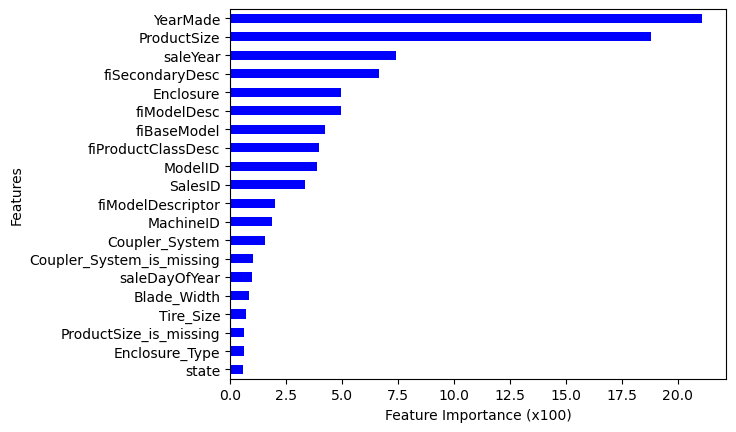

In [165]:
fig = plot_feature_importance(rf_reg_model, X_train, 20)

In [153]:
#fig